In [1]:
#Set up workspace
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import imageio
import pylab as pl
%matplotlib inline


In [2]:
pic = imageio.imread('Paintings/Boating.jpg')
plt.figure(figsize = (15,15))
plt.title('"Boating"\nRenoir')
plt.imshow(pic)

FileNotFoundError: No such file: 'C:\Users\taiwo\Project_Planning\Paintings\Boating.jpg'

In [ ]:
print('Type of the image : ' , type(pic))
print('Shape of the image : {}'.format(pic.shape))
print('Image Height {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

In [ ]:
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

In [ ]:
plt.figure(figsize = (20,15))

plt.subplot(1, 3, 1)
plt.title('R channel')
plt.imshow(pic[ : , : , 0])

plt.subplot(1, 3, 2)
plt.title('G channel')
plt.imshow(pic[ : , : , 1])

plt.subplot(1, 3, 3)
plt.title('B channel')
plt.imshow(pic[ : , : , 2])
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    #Assign each color channel
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)

Why do these look so different from the above?

In [13]:
#OK, let's get the image in grayscale using a "Weighted average" formula referenced here
#https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale

gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
#gray_ren = gray(pic)  
#plt.figure( figsize = (10,10))
#plt.imshow(gray_ren, cmap = plt.get_cmap(name = 'gray'))
#plt.show()

In [ ]:
plt.figure(figsize = (20,15))

# Only Red Pixel value , higher than 180
red_pic = pic.copy()
red_mask = red_pic[:, :, 0] < 160
red_pic[red_mask] = 0

green_pic = pic.copy()
green_mask = green_pic[:, :, 1] < 160
green_pic[green_mask] = 0

blue_pic = pic.copy()
blue_mask = blue_pic[:, :, 2] < 160
blue_pic[blue_mask] = 0

#PLOT THE ABOVE
plt.subplot(1, 3, 1)
plt.imshow(red_pic)
plt.title('R channel')

plt.subplot(1, 3, 2)
plt.imshow(green_pic)
plt.title('G channel')

plt.subplot(1, 3, 3)
plt.imshow(blue_pic)
plt.title('B channel')

plt.show()

In [ ]:
final_mask = np.logical_and(red_mask, green_mask, blue_mask)
final_pic = pic.copy()
final_pic[final_mask] = 40
plt.figure(figsize=(15,15))
plt.imshow(final_pic)

In [3]:
#Ok, let's convert the grayscale to a simple black-white: that may help us in observing the 
#"Fractal" structure (and other formal qualities)

def bw_convert(img,thresh):
    bw_pic = img.copy()
    bw_mask = bw_pic[:, :,] < thresh
    bw_pic[bw_mask] = 0
    bw_pic[~bw_mask] = 1
    
    return bw_pic

In [ ]:
bw_pic = bw_convert(gray_ren,150)

plt.figure(figsize = (20,15))
plt.imshow(bw_pic)

Ok, let's see if we can compute the fractal dimension of the above. 

In [ ]:
# finding all the non-zero pixels

pixels=[]
for i in range(bw_pic.shape[0]):
    for j in range(bw_pic.shape[1]):
        if bw_pic[i,j]>0:
            pixels.append((i,j))

In [ ]:
Lx=bw_pic.shape[1]
Ly=bw_pic.shape[0]

pixels=pl.array(pixels)
 
# computing the fractal dimension
#considering only scales in a logarithmic list
scales=np.logspace(0.01, 1, num=10, endpoint=False, base=2)

Ns=[]
# looping over several scales
for scale in scales:
    print ("======= Scale :",scale)
    # computing the histogram
    H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
    Ns.append(np.sum(H>0))

In [ ]:
# linear fit, polynomial of degree 1
coeffs=np.polyfit(np.log(scales), np.log(Ns), 1)
 
pl.plot(np.log(scales),np.log(Ns), 'o', mfc='none')
pl.plot(np.log(scales), np.polyval(coeffs,np.log(scales)))
pl.xlabel('log $\epsilon$')
pl.ylabel('log N')

In [ ]:
print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficient

Note: 1980s formal analysis, triangular composition. 

In [ ]:
van = imageio.imread('Paintings/Wheat_Field.jpg')
plt.figure(figsize = (15,15))
plt.title('"Wheat Field"\nvan Gogh')
plt.imshow(van)

In [ ]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray_van = gray(van)  
plt.figure( figsize = (10,10))
plt.imshow(gray_van, cmap = plt.get_cmap(name = 'gray'))
plt.show()

In [ ]:
bw_van = bw_convert(gray_van,130)

plt.figure(figsize = (10,10))
plt.imshow(bw_van)

In [4]:
#Ok, let's write a formula that can convert from color to bw/binary image
def make_bw(img,thresh=130):
    gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
    gray_img = gray(img)
    bw_img = bw_convert(gray_img,thresh)
    
    return bw_img

Could we write something that is able to extract/identify forms or patterns?

In [5]:
#Edge Detection
import skimage
import skimage.feature
import skimage.viewer
import sys
from skimage.data import camera
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr, scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h

C:\Users\taiwo\Anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [6]:
edge_scharr = scharr(bw_van)
edge_prewitt = prewitt(bw_van)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(40,20))

ax[0].imshow(edge_scharr, cmap=plt.cm.gray)
ax[0].set_title('Scharr Edge Detection')

ax[1].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[1].set_title('Prewitt Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


NameError: name 'bw_van' is not defined

In [7]:
from skimage import data, segmentation, filters, color
from skimage.future import graph
from matplotlib import pyplot as plt

def weight_boundary(graph, src, dst, n):
    default = {'weight': 0.0, 'count': 0}

    count_src = graph[src].get(n, default)['count']
    count_dst = graph[dst].get(n, default)['count']

    weight_src = graph[src].get(n, default)['weight']
    weight_dst = graph[dst].get(n, default)['weight']

    count = count_src + count_dst
    return {
        'count': count,
        'weight': (count_src * weight_src + count_dst * weight_dst)/count
    }


def merge_boundary(graph, src, dst):
    """Call back called before merging 2 nodes.

    In this case we don't need to do any computation here.
    """
    pass

In [ ]:
img = gray_van.copy()
edges = filters.sobel(img)
labels = segmentation.slic(img, compactness=60, n_segments=20)
g = graph.rag_boundary(labels, edges)
labels2 = graph.merge_hierarchical(labels, g, thresh=0.08, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_boundary,
                                   weight_func=weight_boundary)

plt.figure(figsize = (20,15))
out = color.label2rgb(labels2, img, kind='avg')
plt.imshow(out)
plt.show()

Ok, so the above segmented the image into color blocks. And it looks nice and intuitive. Now let's write our own edge detector that returns a "1" wherever there is a change in value. 

In [8]:
# finding all the non-zero pixels

pixels=[]
for i in range(out.shape[0]):
    for j in range(out.shape[1]):
        if i==0:
            pixels.append(0)
        elif j==0:
            pixels.append(0)
        elif i==out.shape[0]-1: ##
            pixels.append(0)
        elif j==out.shape[1]-1: ##
            pixels.append(0)
        
        elif out[i,j]!=out[i-1,j]:
            pixels.append(1)
        elif out[i,j]!=out[i,j+1]:
            pixels.append(1)
            
        elif out[i,j]!=out[i+1,j]:
            pixels.append(1)
        elif out[i,j]!=out[i,j+1]:
            pixels.append(1)
        else:
            pixels.append(0)

pixels_matrix = np.array(pixels).reshape(out.shape)

NameError: name 'out' is not defined

In [ ]:
plt.figure(figsize = (25,25))
plt.spy(pixels_matrix)

In [ ]:
plt.spy(pixels_matrix[800:1200, 800:1200])

Ok, so the above gets the edges. But they are so faint, and also quite rough....is there a way to make them smoother, and also to make them thicker (just for the sake of visibility)?

Actually, interpolation itself would make this smoother. 

Ok, let's write a formula that does all of the above. 

In [9]:
def get_edges(image):
    gray_img = gray(image)  
    
    edges = filters.sobel(gray_img)
    labels = segmentation.slic(gray_img, compactness=30, n_segments=10)
    g = graph.rag_boundary(labels, edges)
    labels2 = graph.merge_hierarchical(labels, g, thresh=0.08, rag_copy=False,
                                       in_place_merge=True,
                                       merge_func=merge_boundary,
                                       weight_func=weight_boundary)

    out = color.label2rgb(labels2, gray_img, kind='avg')
    
    # finding all the non-zero pixels
    pixels=[]
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            if i==0:
                pixels.append(0)
            elif j==0:
                pixels.append(0)
            elif i==out.shape[0]-1: ##
                pixels.append(0)
            elif j==out.shape[1]-1: ##
                pixels.append(0)

            elif out[i,j]!=out[i-1,j]:
                pixels.append(1)
            elif out[i,j]!=out[i,j+1]:
                pixels.append(1)

            elif out[i,j]!=out[i+1,j]:
                pixels.append(1)
            elif out[i,j]!=out[i,j+1]:
                pixels.append(1)
            else:
                pixels.append(0)

    pixels_matrix = np.array(pixels).reshape(out.shape)
    
    return pixels_matrix

In [ ]:
Rothko = imageio.imread('Paintings/Rothko.jpeg')
plt.figure(figsize = (15,15))
plt.title('"Orange and Yellow"\nRothko')
plt.imshow(Rothko)

In [ ]:
rothko_edges = get_edges(Rothko)
plt.figure(figsize = (15,15))
plt.spy(rothko_edges)

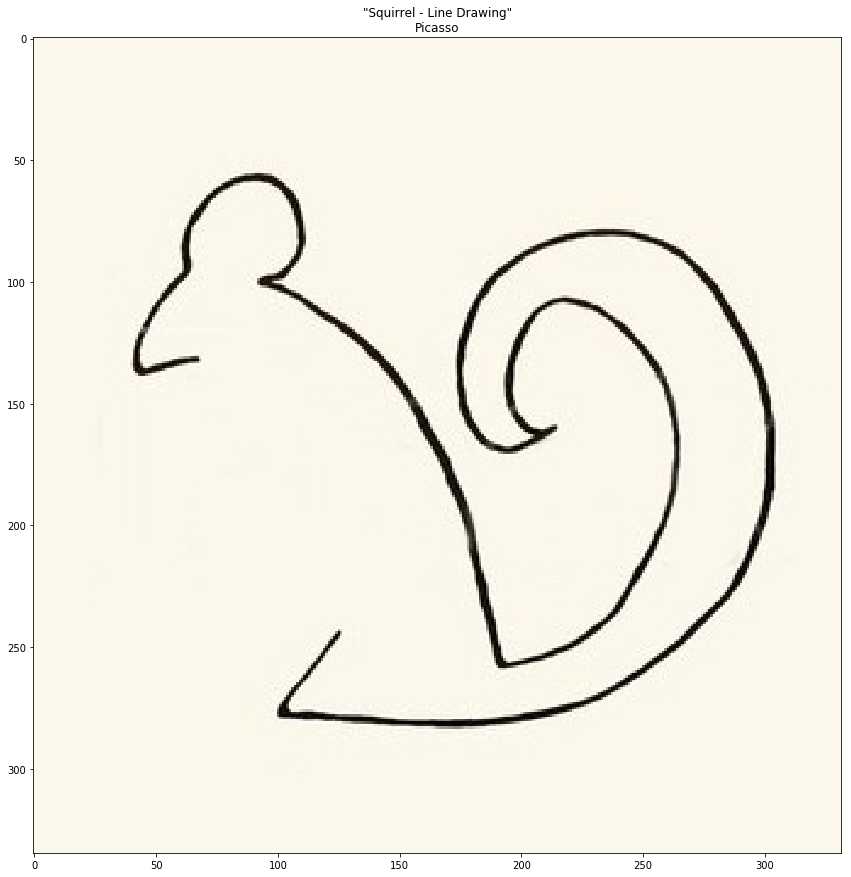

In [10]:
squirrel = imageio.imread('Paintings/squirrel.jpg')
plt.figure(figsize = (15,15))
plt.title('"Squirrel - Line Drawing"\nPicasso')
plt.imshow(squirrel)

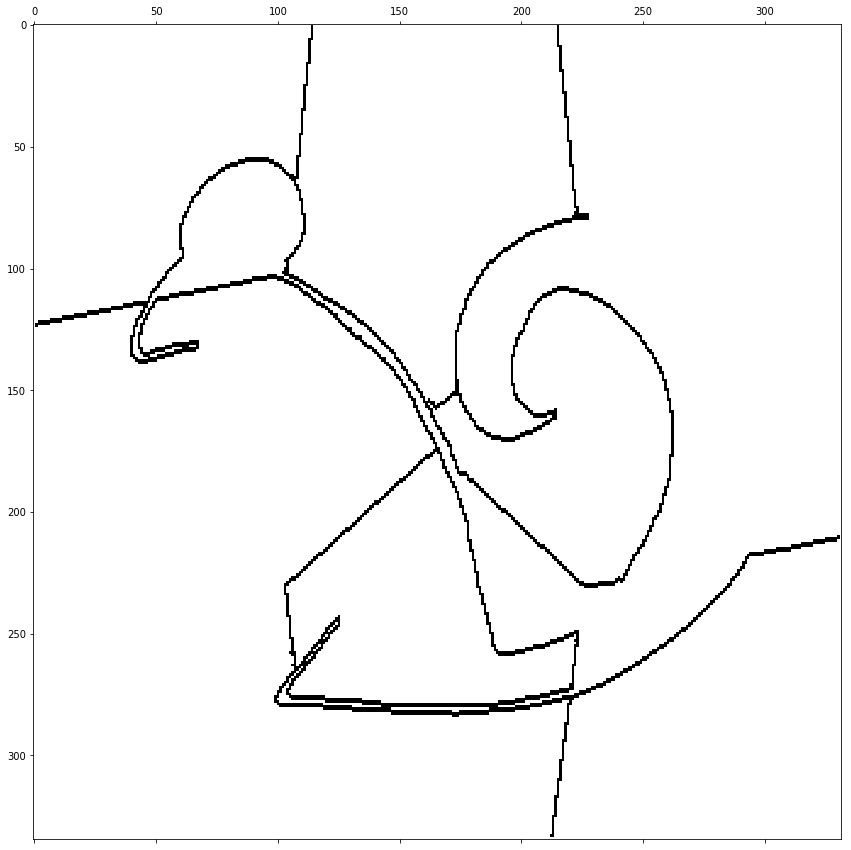

In [14]:
squirrel_edges = get_edges(squirrel)
plt.figure(figsize = (15,15))
plt.spy(squirrel_edges)

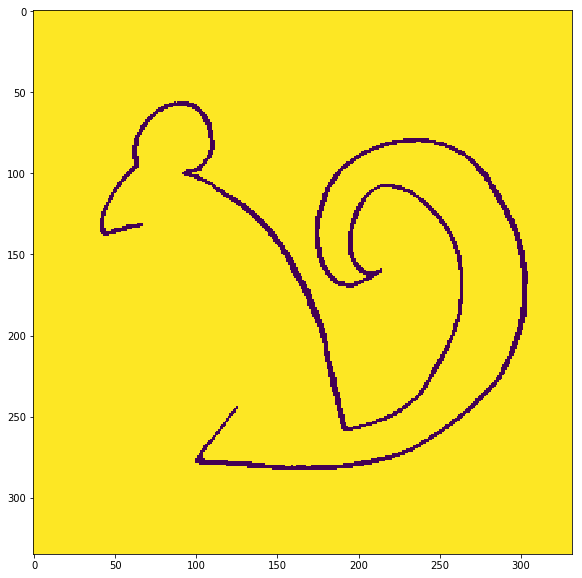

In [15]:
bw_sq = make_bw(squirrel,130)
plt.figure(figsize = (10,10))
plt.imshow(bw_sq)

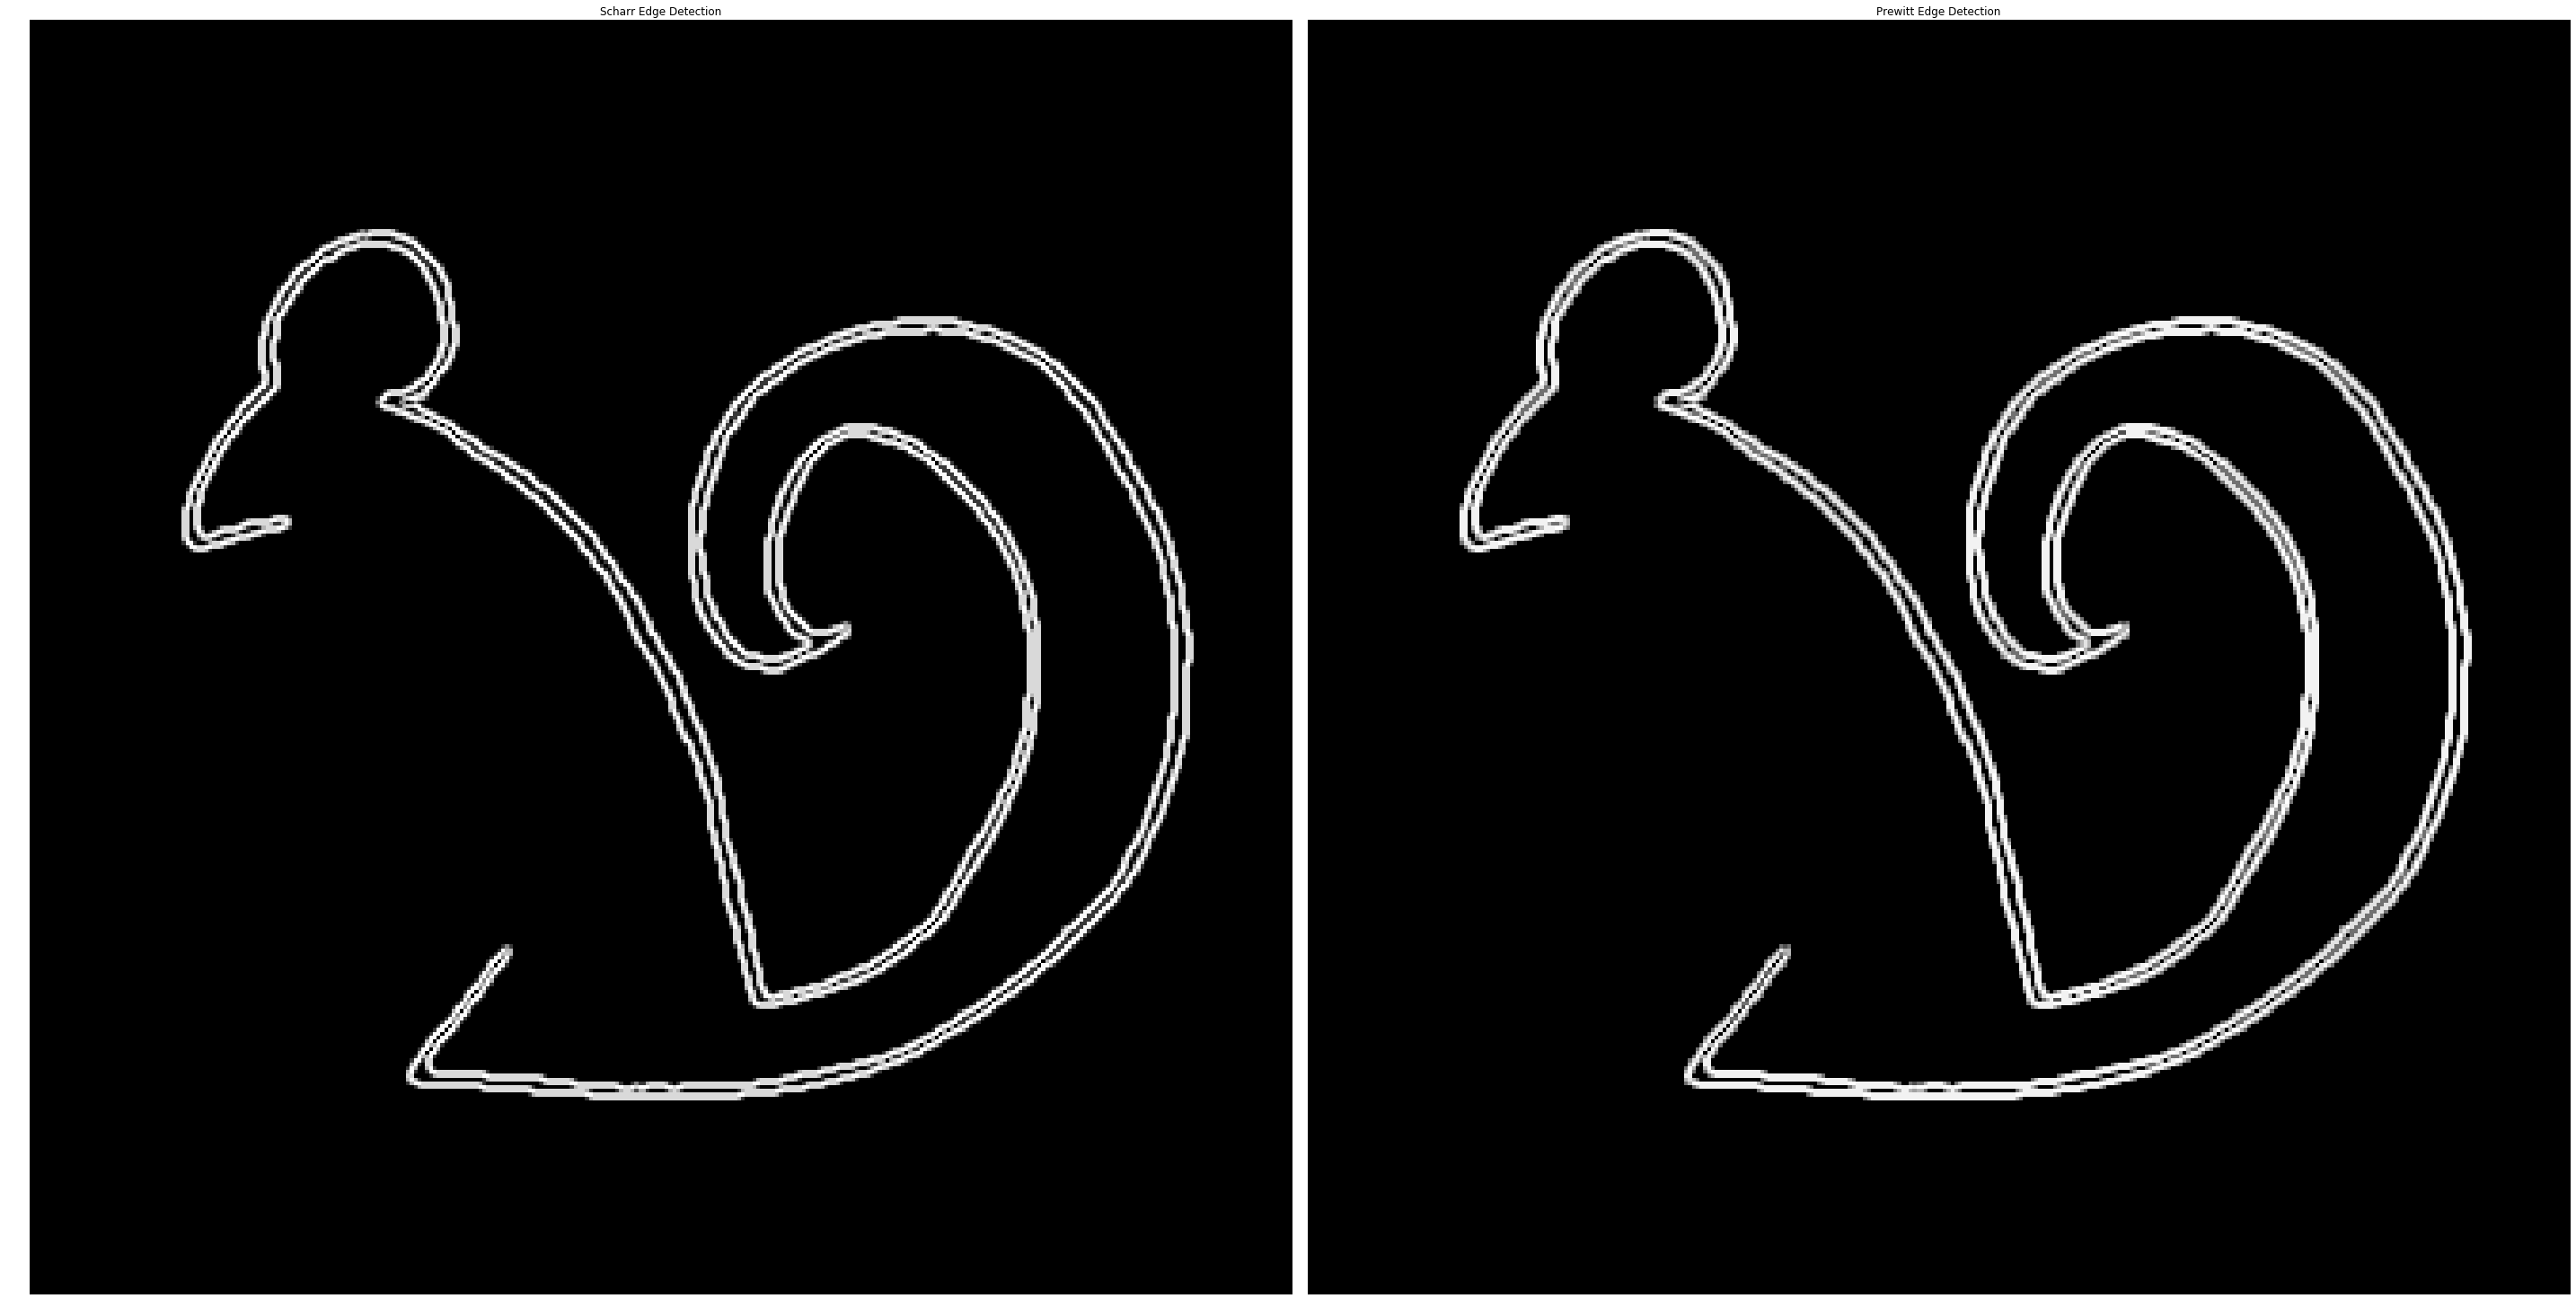

In [16]:
edge_scharr = scharr(bw_sq)
edge_prewitt = prewitt(bw_sq)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(40,20))

ax[0].imshow(edge_scharr, cmap=plt.cm.gray)
ax[0].set_title('Scharr Edge Detection')

ax[1].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[1].set_title('Prewitt Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Ok, great! Edge detection using existing Python packages actually works pretty great for Picasso's line drawings. But you need to follow the following steps: 1. convert to BW; 2. convert to binary. 

In [19]:
edge_scharr.shape

(335, 332)

In [38]:
edge_scharr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

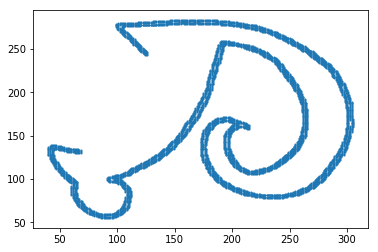

In [52]:
list_of_points = []

for i in range (edge_scharr.shape[0]):
    for j in range (edge_scharr.shape[1]):
        if edge_scharr[i][j]!=0:
            list_of_points.append((i,j))

list_of_points
testList2 = [(elem1, elem2) for elem1, elem2 in list_of_points]
#zip(*testList2)

plt.scatter(*zip(*testList2), s=1)

In [53]:

from skimage.morphology import skeletonize, thin
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
import imageio
from scipy import misc
from skimage import color
from skimage import measure

#Set up workspace
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import imageio
import pylab as plx

array([283.        , 282.9934212 , 282.94932511, ..., 283.28065618,
       283.12265564, 283.        ])

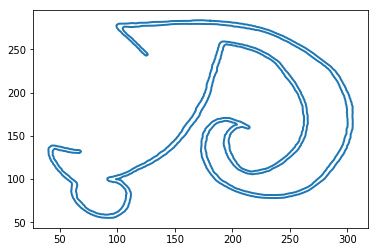

In [55]:
fimg = imageio.imread("Paintings/squirrel.jpg")
gimg = color.colorconv.rgb2grey(fimg)
contours = measure.find_contours(gimg, 0.8)
# print(np.array(contours).shape)
# print(contours)

contours_nd = np.array(contours)

for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

    
contours_nd[0, :, 0]

In [75]:
raw_point_array= contours_nd[0]
import pandas as pd
df = pd.DataFrame(raw_point_array)
df

,0,1
0,283.000000,180.849863
1,282.993421,181.000000
2,282.949325,182.000000
3,282.867760,183.000000
4,282.856885,184.000000
5,282.809663,185.000000
6,282.677946,186.000000
7,282.527682,187.000000
8,282.491899,188.000000
9,282.456901,189.000000


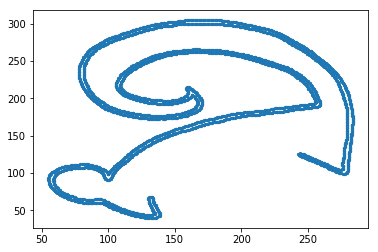

In [89]:

df_unique = df.drop_duplicates(inplace = False) 
df_unique
uniquified_points = df_unique.values

uniquified_points_zip = [(elem1, elem2) for elem1, elem2 in uniquified_points]
plt.scatter(*zip(*uniquified_points_zip), s=5)
#plt.scatter(*zip(*uniquified_points_zip), s=5)

In [102]:
uniquified_points

array([[283.        , 180.8498625 ],
       [282.9934212 , 181.        ],
       [282.94932511, 182.        ],
       ...,
       [283.22122069, 178.        ],
       [283.28065618, 179.        ],
       [283.12265564, 180.        ]])

In [109]:

#raw_point_array[i] corresponds to ith point

def check_x_increasing(point1, point2): #point1 and point2 are [x1,y1], [y1,y2]
    if point1[0] < point2[0]:
        return True 
    else:
        return False
    
def process_point_array(raw_point_array):
    output = []
    cutoff_ind = [0]
    increasing_current = check_x_increasing(raw_point_array[0],raw_point_array[1])
    for point_idx in range(len(raw_point_array)): # point = [x_coord, y_coord]
        if point_idx !=len(raw_point_array)-1:
            if increasing_current !=check_x_increasing(raw_point_array[point_idx], raw_point_array[point_idx+1]):
                cutoff_ind.append(point_idx)
                increasing_current = not increasing_current
    cutoff_ind.append(len(raw_point_array)-1) #the last point
    
    for i in range(len(cutoff_ind)-1):
        output.append(raw_point_array[cutoff_ind[i]:cutoff_ind[i+1]+1])
        
    return output


#https://stackoverflow.com/questions/52524919/fourier-series-fit-in-python
#https://stackoverflow.com/questions/31464345/fitting-a-closed-curve-to-a-set-of-points

In [111]:
splited = process_point_array(uniquified_points)

In [112]:
for i in range(len(splited)):
    


array([[283.        , 180.8498625 ],
       [282.9934212 , 181.        ],
       [282.94932511, 182.        ],
       [282.86776019, 183.        ],
       [282.85688514, 184.        ],
       [282.80966255, 185.        ],
       [282.67794554, 186.        ],
       [282.52768163, 187.        ],
       [282.49189923, 188.        ],
       [282.45690136, 189.        ],
       [282.23017159, 190.        ],
       [282.10109499, 191.        ],
       [282.        , 191.49774043],
       [281.97264408, 192.        ],
       [281.88044487, 193.        ],
       [281.79643322, 194.        ],
       [281.74966982, 195.        ],
       [281.68692333, 196.        ],
       [281.58363054, 197.        ],
       [281.43038224, 198.        ],
       [281.1391626 , 199.        ],
       [281.        , 199.22083313],
       [280.87092897, 200.        ],
       [280.75662868, 201.        ],
       [280.70592454, 202.        ],
       [280.67336319, 203.        ],
       [280.52479996, 204.        ],
 